<b>Binary classification using Deep Neural Networks </b><br>Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
max_length = 200
embedding_dim = 16
num_epochs = 10

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [9]:
train_data.shape

(25000,)

In [4]:
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

In [10]:
train_data.shape

(25000,)

In [5]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer added
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
start_time = time.time()
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels), verbose=1)
train_time = time.time() - start_time
train_time

Epoch 1/10
782/782 [==============================] - 14s 15ms/step - loss: 0.5595 - accuracy: 0.7350 - val_loss: 0.3650 - val_accuracy: 0.8646
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3310 - accuracy: 0.8772 - val_loss: 0.3045 - val_accuracy: 0.8752
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2664 - accuracy: 0.9047 - val_loss: 0.2885 - val_accuracy: 0.8796
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2281 - accuracy: 0.9232 - val_loss: 0.2993 - val_accuracy: 0.8763
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2019 - accuracy: 0.9352 - val_loss: 0.3104 - val_accuracy: 0.8726
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1830 - accuracy: 0.9442 - val_loss: 0.3253 - val_accuracy: 0.8730
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1595 - accuracy: 0.9530 - val_loss: 0.3487 - val_accuracy:

110.82805824279785

In [5]:
model_name = 'model_2.2_BinClass_IMDB'

In [8]:
model.save(model_name)

INFO:tensorflow:Assets written to: model_2.2_BinClass_IMDB\assets


INFO:tensorflow:Assets written to: model_2.2_BinClass_IMDB\assets


In [6]:
model = load_model(model_name)

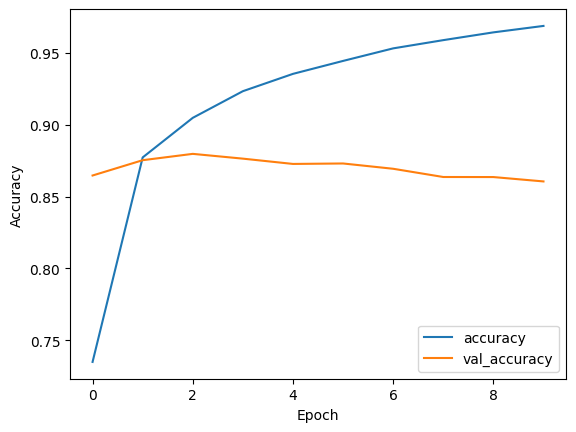

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

782/782 [==============================] - 6s 6ms/step - loss: 0.4481 - accuracy: 0.8605
Test accuracy: 0.860480010509491


In [8]:
def classify_review(review_text):
    word_index = imdb.get_word_index()
    words = review_text.lower().split()
    
    # Remove stopwords
    stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    words = [word for word in words if word not in stopwords]
    
    review = [1]
    for word in words:
        index = word_index.get(word, 0)
        if index < vocab_size:
            review.append(index + 3)
        else:
            review.append(2)
    review = pad_sequences([review], maxlen=max_length)
    start_time = time.time()
    prediction = model.predict(review)
    end_time = time.time()
    pred_time = end_time - start_time
    return "Positive" if prediction[0][0] >= 0.5 else "Negative", pred_time

In [9]:
def get_user_review():
    review = input("Please enter your movie review: ")
    return review

In [ ]:
while True:
    review = get_user_review()
    classification, pred_time = classify_review(review)
    print(f"\nClassification: {classification}")
    print(f"Prediction Time: {pred_time} seconds")
    continue_input = input("Do you want to classify another review? (yes/no): ")
    if continue_input.lower() != 'yes':
        break

Please enter your movie review: It is no wonder that the film has such a high rating, it is quite literally breathtaking. What can I say that hasn't said before? Not much, it's the story, the acting, the premise, but most of all, this movie is about how it makes you feel. Sometimes you watch a film, and can't remember it days later, this film loves with you, once you've seen it, you don't forget.  The ultimate story of friendship, of hope, and of life, and overcoming adversity.  I understand why so many class this as the best film of all time, it isn't mine, but I get it. If you haven't seen it, or haven't seen it for some time, you need to watch it, it's amazing.
1/1 [==============================] - 0s 61ms/step

Classification: Positive
Prediction Time: 0.16401004791259766 seconds
